In [22]:

# !pip3 install numpy
# !pip3 install tqdm
# !pip3 install matplotlib

In [1]:
%load_ext autoreload
%autoreload 2
from tests import test_method, confidence_interval, confidence_interval_steps
import matplotlib.pyplot as plt
from case_studies import *
from alg import BFGS, get_point, newton_lin_eq, steepest_lin_eq, generate_A
import numpy as np

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from time import time
from scipy.optimize import newton

plt.style.use('seaborn')
params = {'axes.labelsize': 20,'axes.titlesize':20, 'legend.fontsize': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18}

C:\Users\14552\AppData\Local\Temp\ipykernel_19692\2050333237.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# m, n = 4,5
# A = generate_A(m,n)
# b = np.random.rand(m)


# x = np.random.rand(n)
# start_x = get_point(A,b,x)

In [24]:
# xks, dfs,iters = newton_lin_eq(start_x,f4,df4,Hf4,1.0e-10,A,0.01, 0.5) 
# print(iters)

1000


In [135]:
def plot_convergence(func_name, func, grad, hessian, max_iter=1000, dims=20, n_trials=100, con_dims = 15):
    from time import time
    colors = ["red", "blue", "green"]
    optimizers = [steepest_lin_eq,newton_lin_eq]

    m, n = con_dims, dims
    A = generate_A(m,n)
    b = np.random.rand(m)
    fig, ax = plt.subplots(figsize=(15, 10))

    
    runtimes = []
    
    #x_0s = (np.random.rand(n_trials, dims) - 0.5) * 200
    for color, optimizer in zip(colors, optimizers):
        trials = []
        x_0s = (np.random.rand(n_trials, dims) - 0.5) *200
        for i in range(len(x_0s)):
            x_0s[i] = get_point(A,b,x_0s[i])
        min_len = max_iter
        max_len = 0
        M = np.eye(A.shape[1]) - A.T@np.linalg.inv(A@A.T)@A
        for x_0 in x_0s:
            
            #xs, dfs = steepest_lin_eq(x_0,func, grad,1.0e-3,A,0.01, 0.3,max_iter=max_iter)
            
            
            

            if optimizer.__name__ == "newton_lin_eq":
                xs, dfs,criteria = newton_lin_eq(x_0,func,grad,hessian,1.0e-10,A,b,0.001, 0.5,max_iter=max_iter)
            if optimizer.__name__ == "steepest_lin_eq":
                xs, dfs, criteria = steepest_lin_eq(x_0,func, grad,1.0e-10,A,0.001, 0.5, x_opt("f3",dims), max_iter=max_iter)

            #print(criteria)

            

            grad_norms = criteria
            
            #print(xs[-1])

            if len(grad_norms) > max_len:
                max_len = len(grad_norms)
            if len(grad_norms) < max_iter:
                if len(grad_norms) < min_len:
                    min_len = len(grad_norms)
                grad_norms = np.pad(grad_norms, (0, max_iter - len(grad_norms)), constant_values=grad_norms[-1])

            trials.append(grad_norms)
            
        trials = np.array(trials)

        mean = np.mean(trials[:, :max_len], axis=0)
        std = np.std(trials[:, :max_len], axis=0)
        print(std)

        ax.plot(np.arange(max_len), mean, label=f" {optimizer.__name__} mean")
        ax.fill_between(np.arange(max_len), mean+std, mean-std, alpha=0.2, label=f" $\pm$ std")
        #ax.vlines(min_len, 0, np.max(trials), linestyle="dotted", alpha=0.1)
    #ax.set(title=f"Newton Constrainted optimization\n{func_name} (n={dims},m={con_dims})", xlabel="Step $k$", ylabel="$||p_k^T\\nabla f(x_k)||$ (log scale)")
    ax.set(title=f"Newton Constrainted optimization\n{func_name} (n={dims},m={con_dims})", yscale="log", xlabel="Step $k$", ylabel="$||p_k^T\\nabla f(x_k)||$ (log scale)")
    ax.legend( )
    
    return fig, ax

In [136]:
def plot_runtime_comparison(func_name, func, grad, hessian, max_iter=1000, dims=20, n_trials=100, con_dims = 15):
    from time import time
    optimizers = [steepest_lin_eq,newton_lin_eq]
    colors = ["red", "blue"]
    
    m, n = con_dims, dims
    trial_runtimes_S = []
    trial_runtimes_N = []
    trial_iterations_S = []
    trial_iterations_N = []
    fig, ax = plt.subplots(figsize=(12, 10))
    runtimes = []
    iterations = []

    # Nx_0s = (np.random.rand(n_trials, dims) - 0.5) * 200
    # Sx_0s = Nx_0s

    # for i in range(len(Nx_0s)):
    #     A = generate_A(m,n)
    #     b = np.random.rand(m)
    #     for optimizer in optimizers:
    #         start = time()
    #         if optimizer.__name__ == "newton_lin_eq":
    #             xs, dfs,criteria = newton_lin_eq(Nx_0s[i],func,grad,hessian,1.0e-12,A,b,0.001, 0.5,max_iter=max_iter)
    #             end = time()  
    #             trial_runtimes_N.append(end - start)
    #             trial_iterations_N.append(len(xs))                
    #         if optimizer.__name__ == "steepest_lin_eq":
    #             xs, dfs, criteria = steepest_lin_eq(Sx_0s[i],func, grad,1.0e-12,A,0.001, 0.5, x_opt("f3",dims), max_iter=max_iter)
    #             end = time()  
    #             trial_runtimes_S.append(end - start)
    #             trial_iterations_S.append(len(xs))
                      



    for color, optimizer in zip(colors, optimizers):
        trial_runtimes = []
        trial_iterations = []
        x_0s = (np.random.rand(n_trials, dims) - 0.5) * 200
        min_len = max_iter
        max_len = n_trials
        for x_0 in x_0s:
            A = generate_A(m,n)
            b = np.random.rand(m)
            start = time()
            if optimizer.__name__ == "steepest_descent":
                xs, dfs, criteria = steepest_lin_eq(x_0,func, grad,1.0e-10,A,0.001, 0.5, x_opt("f3",dims), max_iter=max_iter)
            else:
                xs, dfs,criteria = newton_lin_eq(x_0,func,grad,hessian,1.0e-10,A,b,0.001, 0.5,max_iter=max_iter)
            end = time()
            """
            grad_norms = np.array([np.linalg.norm(grad(x)) for x in xs])

            if len(grad_norms) > max_len:
                max_len = len(grad_norms)
            if len(grad_norms) < max_iter:
                if len(grad_norms) < min_len:
                    min_len = len(grad_norms)
                grad_norms = np.pad(grad_norms, (0, max_iter - len(grad_norms)), constant_values=grad_norms[-1])
            """
            trial_runtimes.append(end - start)
            trial_iterations.append(len(xs))
            
            
        runtimes.append(trial_runtimes)
        iterations.append(trial_iterations)
        #mean = np.mean(trials[:max_len], axis=0)
        #std = np.std(trials[:max_len], axis=0)

        #ax.plot(np.arange(max_len), mean, c=color, label=f"({optimizer.__name__}) mean")
        #ax.fill_between(np.arange(max_len), mean-std, mean+std, alpha=0.2, color=color, label=f"({optimizer.__name__}) $\pm$ std")
        #ax.vlines(min_len, 0, np.max(trials), linestyle="dotted", alpha=0.1)
    ax.boxplot(runtimes, labels=[opt.__name__ for opt in optimizers], showfliers=False)
    ax.set(title=f"Comparison of Runtime\n{func_name} (m={con_dims}, n={dims}, $\\epsilon$ = $1.0e^{-10}$)", ylabel="Runtime ms")
    
    #ax2.boxplot(iterations, labels=[opt.__name__ for opt in optimizers], showfliers=False)
    #ax2.set(title="Comparison of Iterations", ylabel="Steps")
    
    return fig, ax

In [224]:
def plot_from_global(func_name, func, grad, hessian, max_iter=1000, dims=20, n_trials=100, con_dims = 15):
    from time import time
    eta_schedules = ["linear", "superlinear", "quadratic"]
    colors = ["red", "blue", "green"]
    optimizers = [steepest_lin_eq,newton_lin_eq]

    m, n = con_dims, dims
    A = generate_A(m,n)
    b = np.random.rand(m)
    fig, ax = plt.subplots(figsize=(5, 5))
    xopt = x_opt(func_name,dims)

    
    runtimes = []
    
    #x_0s = (np.random.rand(n_trials, dims) - 0.5) * 200
    for color, optimizer in zip(colors, optimizers):
        trials = []
        x_0s = (np.random.rand(n_trials, dims) - 0.5) *200
        for i in range(len(x_0s)):
            x_0s[i] = get_point(A,b,x_0s[i])
        min_len = max_iter
        max_len = 0
        M = np.eye(A.shape[1]) - A.T@np.linalg.inv(A@A.T)@A
        for x_0 in x_0s:
            
            #xs, dfs = steepest_lin_eq(x_0,func, grad,1.0e-3,A,0.01, 0.3,max_iter=max_iter)
            
            
            

            if optimizer.__name__ == "newton_lin_eq":
                xs, dfs,criteria = newton_lin_eq(x_0,func,grad,hessian,1.0e-8,A,b,0.001, 0.5,max_iter=max_iter)
                
            if optimizer.__name__ == "steepest_lin_eq":
                xs, dfs, criteria = steepest_lin_eq(x_0,func, grad,1.0e-8,A,0.001, 0.5, x_opt("f3",dims), max_iter=max_iter)

            #grad_norms = np.array([np.linalg.norm((M@grad(x)).T@grad(x)) for x in xs])
            #grad_norms = np.array([np.linalg.norm(grad(x)) for x in xs])
            distance = np.array([np.linalg.norm(x-xopt) for x in xs])


            #print(xs[-1])

            if len(distance) > max_len:
                max_len = len(distance)
            if len(distance) < max_iter:
                if len(distance) < min_len:
                    min_len = len(distance)
                distance = np.pad(distance, (0, max_iter - len(distance)), constant_values=distance[-1])

            trials.append(distance)
            
        trials = np.array(trials)

        mean = np.mean(trials[:, :max_len], axis=0)
        std = np.std(trials[:, :max_len], axis=0)

        ax.plot(np.arange(max_len), mean,  c=color,label=f" {optimizer.__name__} mean")
        ax.fill_between(np.arange(max_len), mean+std, mean-std, alpha=0.2,color=color, label=f" $\pm$ std")
        #ax.vlines(min_len, 0, np.max(trials), linestyle="dotted", alpha=0.1)

    ax.set(title=f"Comparison between Newton Algorithm and \n Steepest Descent on distance from global optimum \n{func_name} (n={dims},m={con_dims})", yscale="symlog", xlabel="Step $k$", ylabel="$||x*-x_{opt}||$ (log scale)")
    ax.legend( )
    
    return fig, ax

## Testing all functions

In [176]:
funcs = [
    ("Ellipsoid", f1, df1, Hf1),
    ("Rosenbrock", f2, df2, Hf2),
    ("Log-ellipsoid", f3, df3, Hf3),
    ("Attractive sector", f4, df4, Hf4),  
    ("Sum of different powers", f5, df5, Hf5)
]
# func_name, func, grad, hess = funcs[2]
# fig, ax = plot_from_global(func_name,func,grad,hess,con_dims=10,dims=20,n_trials=100,max_iter=1000)
# fig.savefig(f"{func_name}_distance.png")

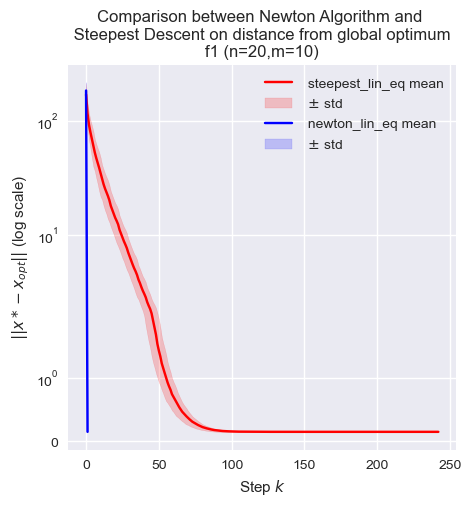

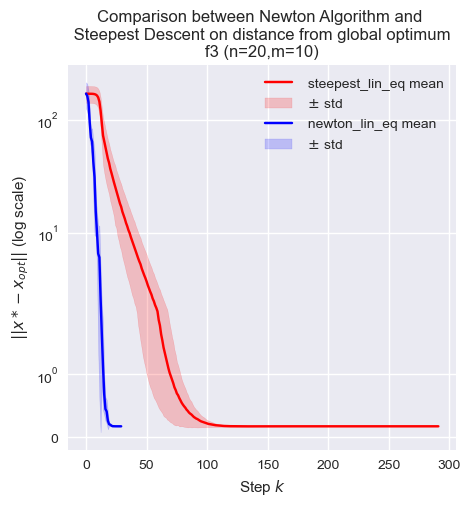

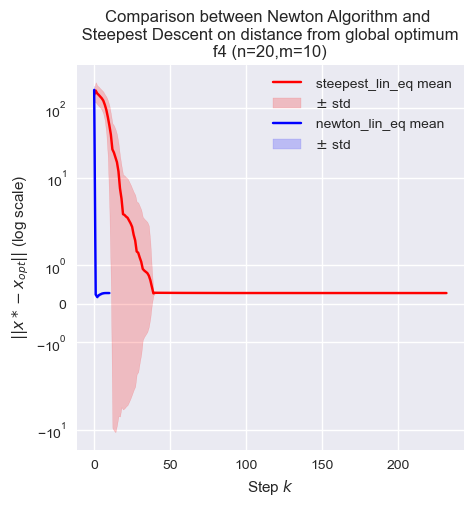

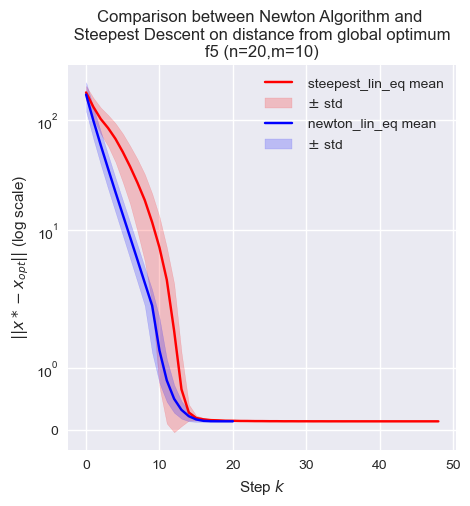

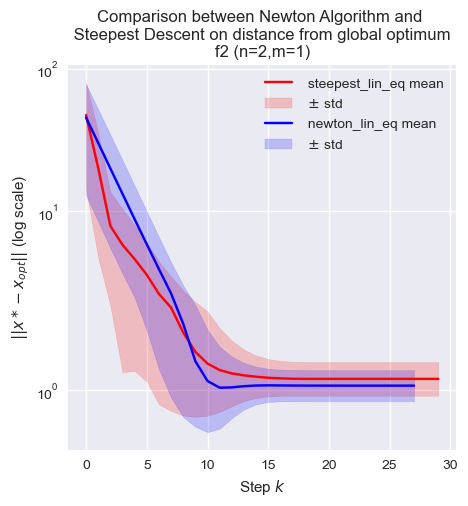

In [225]:
funcs = [
    ("f1", f1, df1, Hf1),
    ("f2", f2, df2, Hf2),
    ("f3", f3, df3, Hf3),
    ("f4", f4, df4, Hf4),  
    ("f5", f5, df5, Hf5)
]

for i in [0,2,3,4]:
    func_name, func, grad, hess = funcs[i]
    fig, ax = plot_from_global(func_name,func,grad,hess,con_dims=10,dims=20,n_trials=10,max_iter=1000)
    fig.savefig(f"{func_name}_distance.png")

func_name, func, grad, hess = funcs[1]
fig, ax = plot_from_global(func_name,func,grad,hess,con_dims=1,dims=2,n_trials=10,max_iter=1000)
fig.savefig(f"{func_name}_distance.png")

[4.53842060e+09 6.75991122e+08 1.08992996e+08 9.75770577e+07
 9.19872767e+07 6.34142065e+07 4.31649118e+07 2.08925711e+07
 1.65109681e+07 1.76625262e+07 1.54256217e+07 1.10794821e+07
 9.75211088e+06 4.88284926e+06 4.68715795e+06 4.91426563e+06
 4.13051476e+06 4.37759290e+06 2.67176373e+06 1.67725214e+06
 1.35011212e+06 1.38199255e+06 1.45470243e+06 1.57632180e+06
 1.26172942e+06 9.63680520e+05 5.46403446e+05 5.30975033e+05
 5.39213388e+05 5.56451158e+05 5.28558588e+05 3.12020675e+05
 2.52221907e+05 2.12232672e+05 1.83268026e+05 1.99581371e+05
 2.11282512e+05 1.74764385e+05 1.19367083e+05 9.81116616e+04
 7.48021619e+04 6.42938177e+04 7.59838717e+04 7.54147644e+04
 6.36824961e+04 4.55355203e+04 3.22285879e+04 2.90877039e+04
 2.46180711e+04 2.90604785e+04 2.75040611e+04 1.66002637e+04
 1.73095230e+04 1.24992134e+04 1.10561800e+04 9.49613393e+03
 1.11784190e+04 1.05439520e+04 6.38639714e+03 6.67785222e+03
 4.64576987e+03 3.65401435e+03 3.63969425e+03 4.21094749e+03
 4.06001515e+03 2.469514

KeyboardInterrupt: 

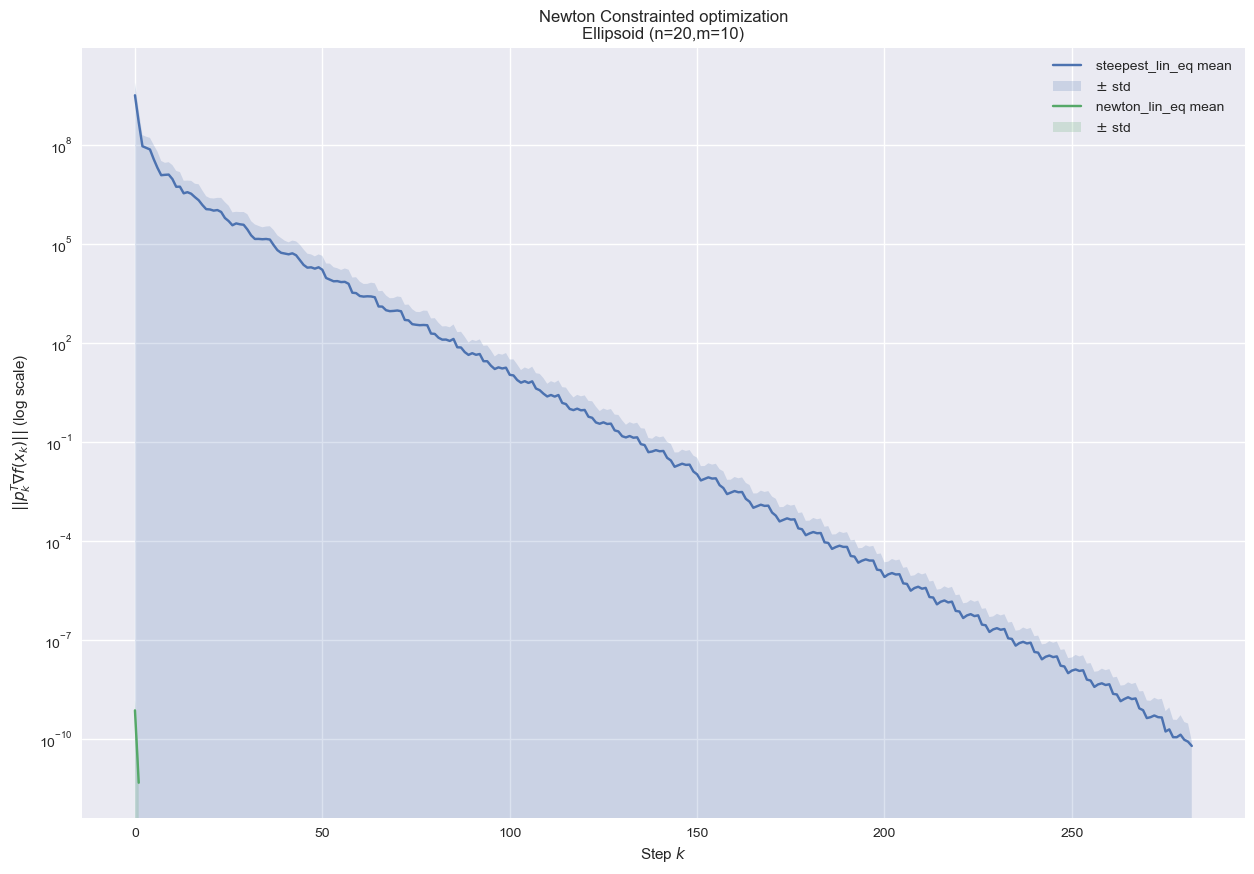

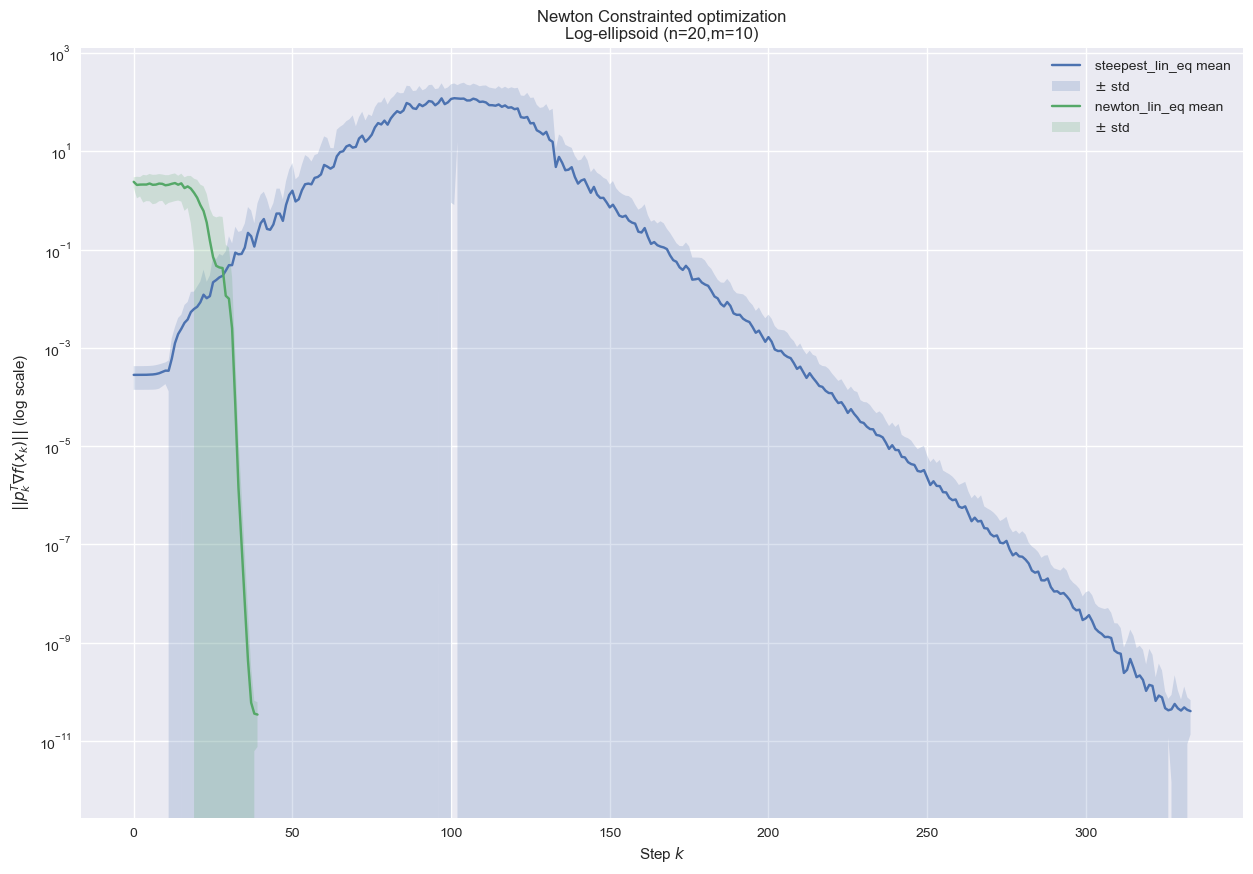

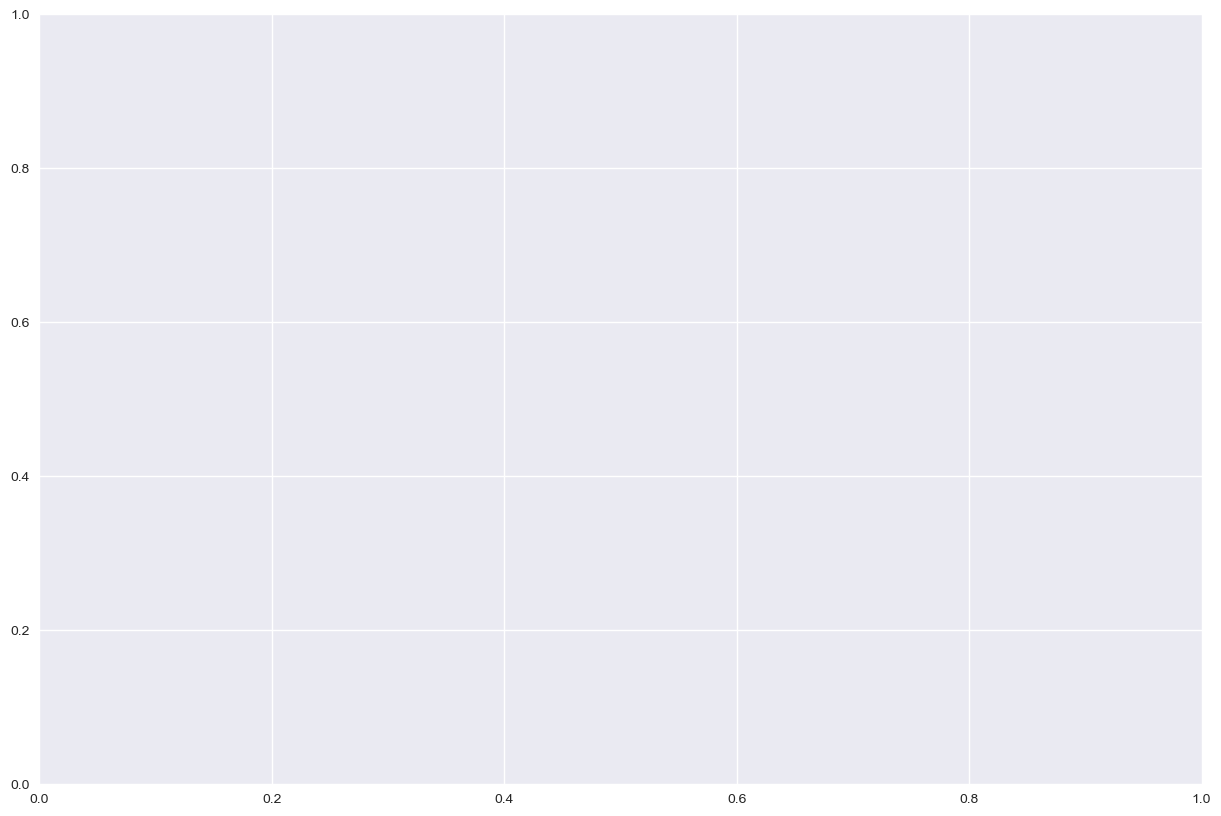

In [177]:

for i in [0,2,3,4]:
    func_name, func, grad, hess = funcs[i]
    fig, ax = plot_convergence(func_name,func,grad,hess,con_dims=10,dims=20,n_trials=100,max_iter=1000)
    fig.savefig(f"{func_name}_convergence.png")

func_name, func, grad, hess = funcs[1]
fig, ax = plot_convergence(func_name,func,grad,hess,con_dims=1,dims=2,n_trials=100,max_iter=1000)
fig.savefig(f"{func_name}_convergence.png")


In [170]:
n_trails = 100

func_name, func, grad, hess = funcs[0]
x_0s = (np.random.rand(100, 20) - 0.5) * 200
num = 0
for x_0 in x_0s:
    A = generate_A(10,20)
    b = np.random.rand(10)
    xs, dfs,criteria = newton_lin_eq(x_0,func,grad,hess,1.0e-10,A,b,0.001, 0.5,max_iter=1000)
    if np.linalg.norm(xs-x_opt("f1",20)) < 0.01  :
        num = num +1

print(num)




0


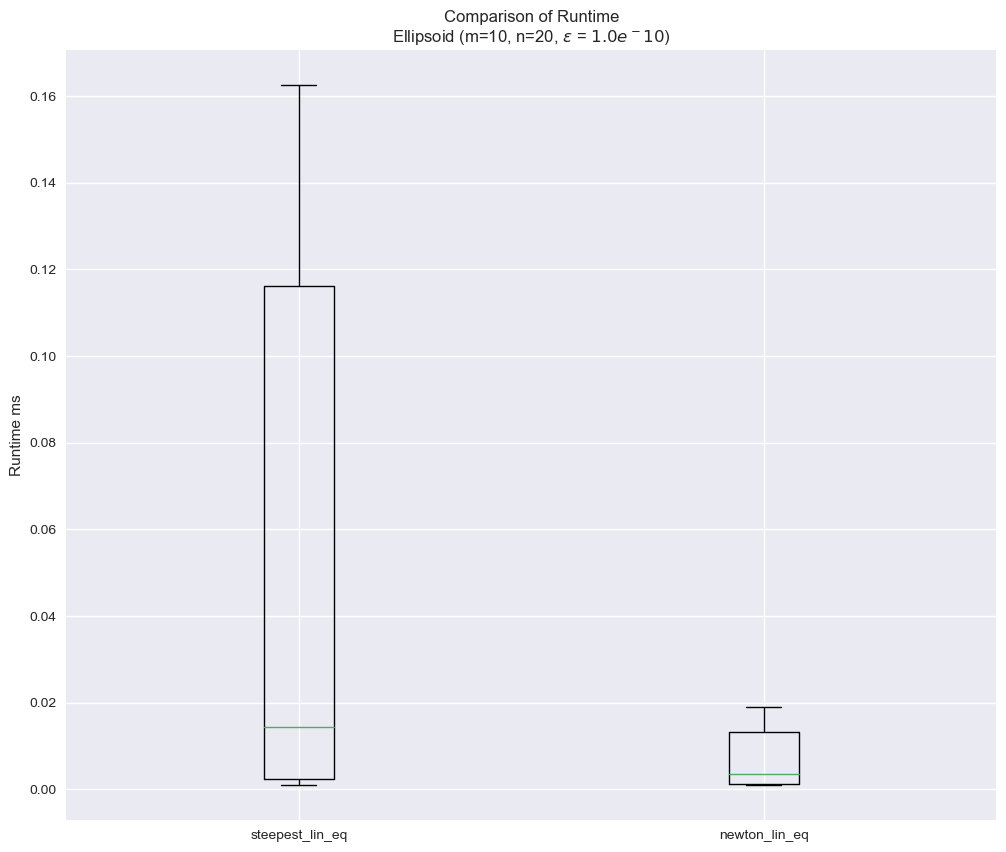

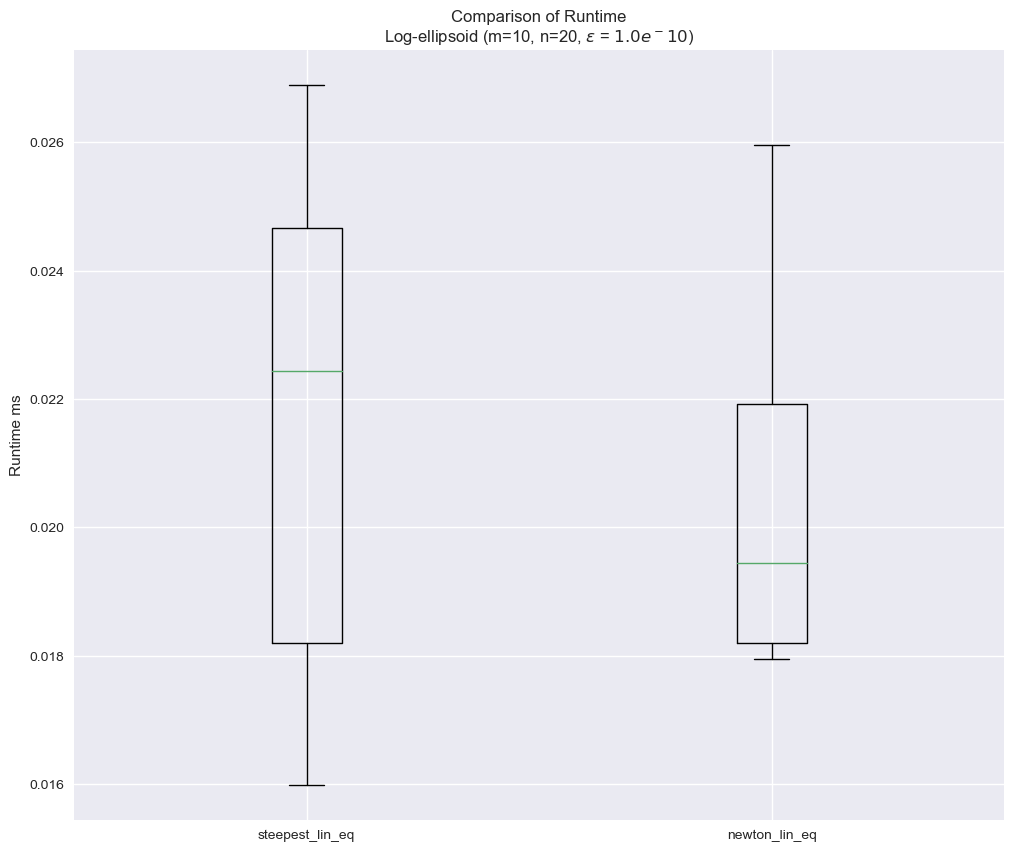

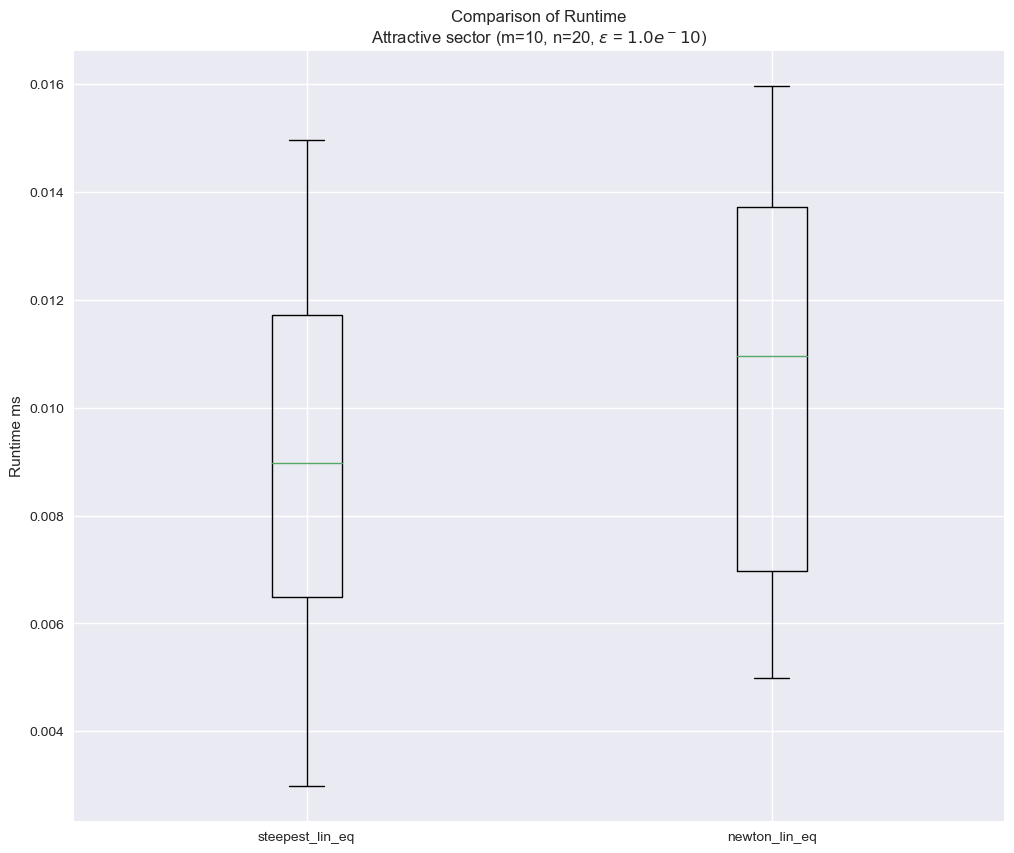

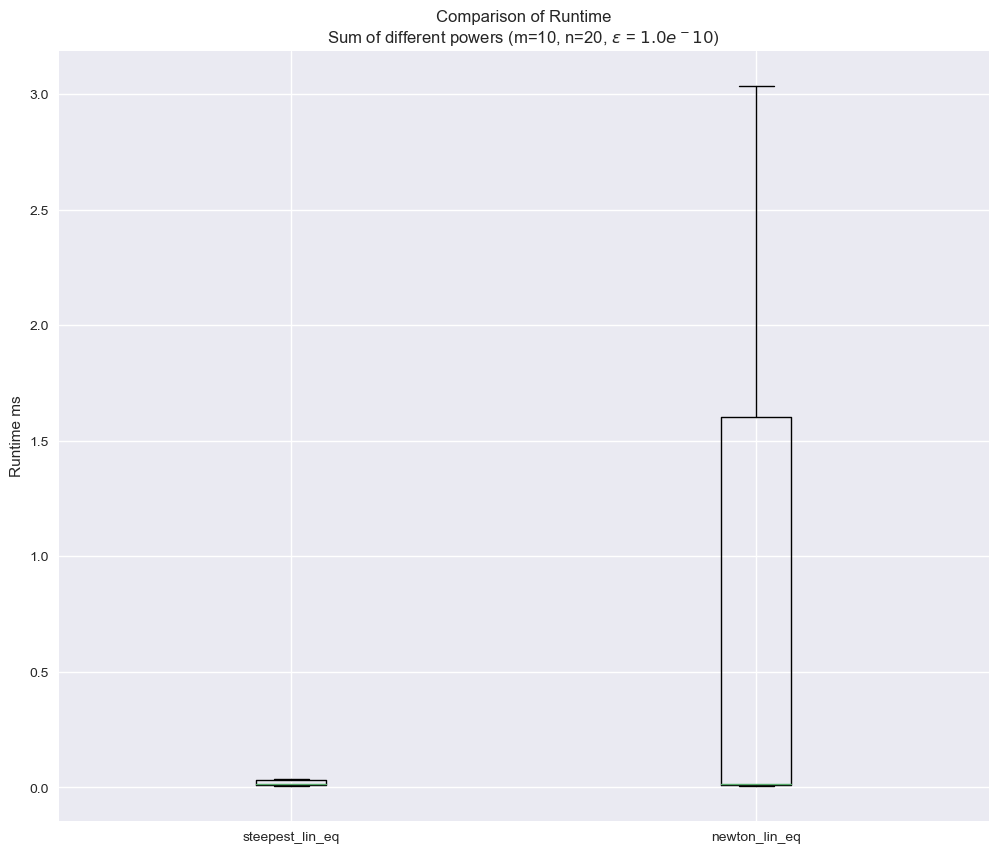

In [152]:

for i in [0,2,3,4]:
    func_name, func, grad, hess = funcs[i]
    fig, ax = plot_runtime_comparison(func_name,func,grad,hess,con_dims=10,dims=20,n_trials=10,max_iter=1000)
    fig.savefig(f"{func_name}_running_time.png")



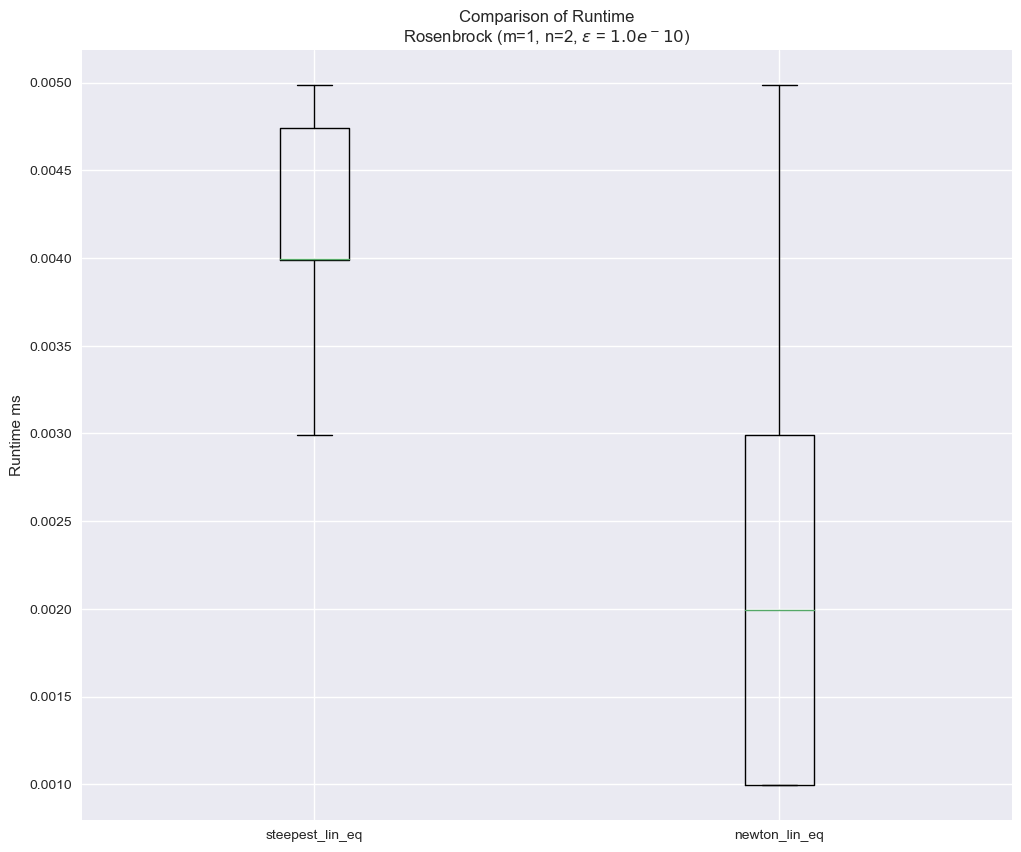

In [153]:
func_name, func, grad, hess = funcs[1]
fig, ax = plot_runtime_comparison(func_name,func,grad,hess,con_dims=1,dims=2,n_trials=10,max_iter=1000)
fig.savefig(f"{func_name}_running_time.png")

In [237]:
def plot_contour(func, x_opt, scipy_evals, own_evals):
    xs = np.linspace(-10, 10, 100)
    ys = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(xs, ys)

    data = np.dstack([X, Y]).reshape(-1, 2)
    Z = np.array([[func(np.array([x, y])) for x in xs] for y in ys])
    Z = Z.reshape(X.shape)

    ## Create contour plot
    fig, ax = plt.subplots(figsize=(5, 5))

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)

    c = ax.contourf(X, Y, Z, cmap=matplotlib.cm.coolwarm, levels=20)
    fig.colorbar(c, cax=cax, orientation="vertical")

    ax.plot(scipy_evals[:,0], scipy_evals[:,1], label=f"Evaluations SciPy Newton ({len(scipy_evals)})", c="purple", linestyle="--", marker="o")
    ax.plot(own_evals[:,0], own_evals[:,1], label=f"Evaluations our Constraint Newton ({len(own_evals)})", c="orange", linestyle="--", marker="o")
    ax.scatter([x_opt[0]], [x_opt[1]], label="Minimum", c="black", marker="x", zorder=100)
    
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.legend()
    
    return fig, ax

In [238]:
def scipy_newton(f,df,Hf,x0,max_iterations,epsilon):
    xs=[]
    grad_norms=[]
    def logging_f(x):
        xs.append(x)
        grad_norms.append(np.maximum(np.linalg.norm(df(x)),10**(-5)*epsilon))
        return f(x)
    minimize(logging_f, x0, method="Newton-CG", jac=df, hess=Hf, tol=epsilon,options={'maxiter':max_iterations,'xtol':epsilon})
    return np.array(xs), np.array(grad_norms)

[[-5.          5.        ]
 [-3.5772408   5.14223325]
 [-2.76177845  5.2561173 ]
 ...
 [-1.61594415  2.612831  ]
 [-1.61381557  2.61267432]
 [-1.61419206  2.60717178]]


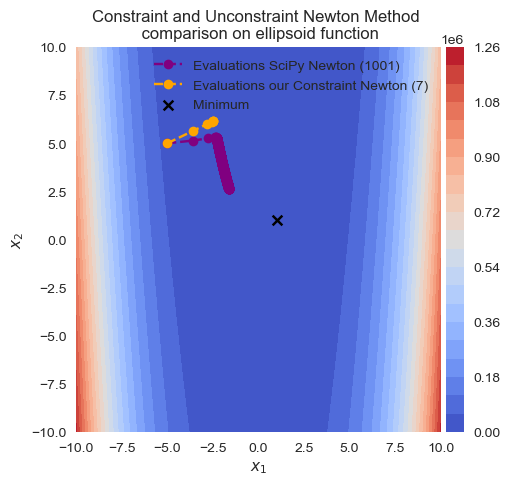

In [239]:


# funcs = [
#     ("Ellipsoid", f1, df1, Hf1),
#     ("Attractive sector", f4, df4, Hf4),
#     ("Sum of different powers", f5, df5, Hf5)
# ]
func_name, func, grad, hess = funcs[1]
A = generate_A(1,2)
b = np.random.rand(1)
x_0 = np.array([-5, 5])

scipy_evals,_ = scipy_newton(func,grad,hess,x_0,1000,10e-10)
print(scipy_evals)
#xs, dfs, criteria = steepest_lin_eq(x_0,func, grad,1.0e-10,A,0.001, 0.5, x_opt("f3",2), max_iter=1000)
xs, dfs,criteria = newton_lin_eq(x_0,func,grad,hess,1.0e-10,A,b,0.001, 0.5,max_iter=1000)

fig, ax = plot_contour(func, x_opt(func_name,2), np.array(scipy_evals), np.array(xs))
ax.set_title("Constraint and Unconstraint Newton Method \n comparison on ellipsoid function")

fig.savefig(f"Newton_contour_{func_name}.png")

TypeError: steepest_lin_eq() missing 1 required positional argument: 'x_opt'

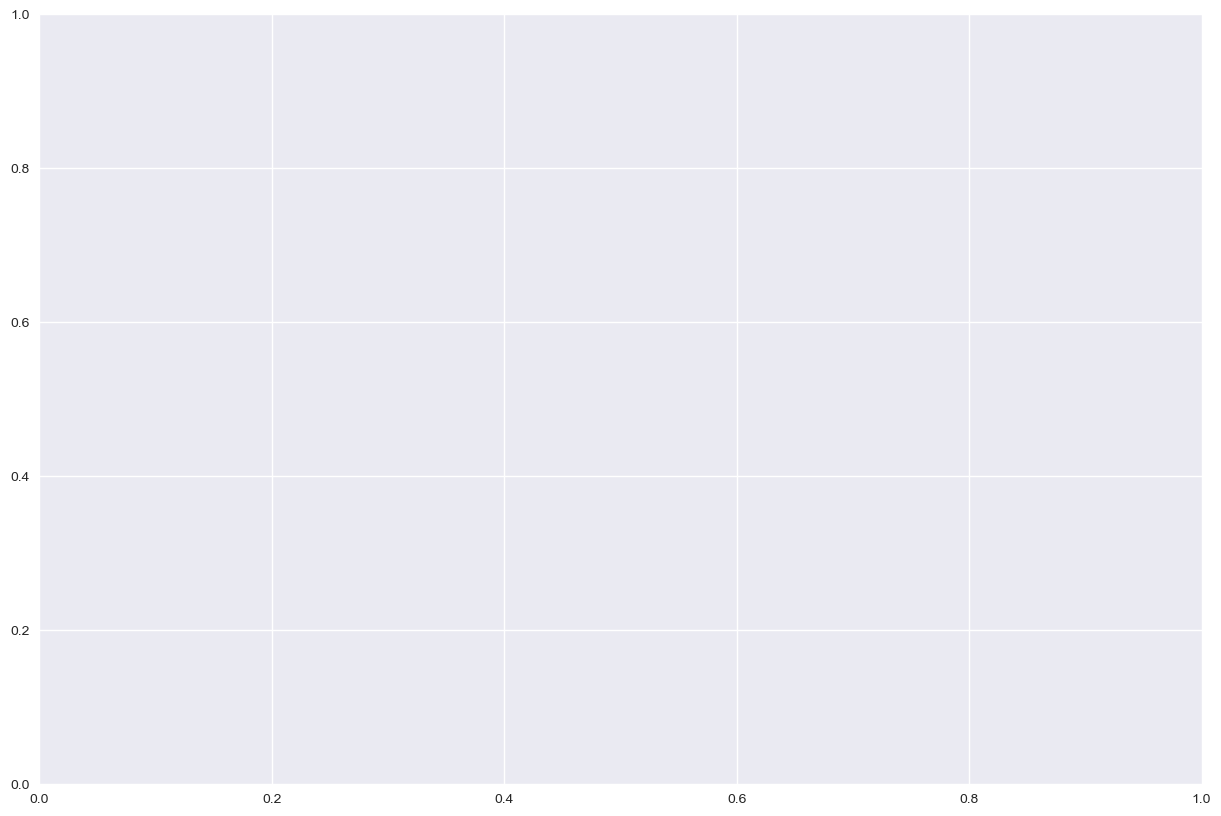

In [30]:
fig, ax = plot_from_global(func_name,func,grad,hess,con_dims=10,dims=20,n_trials=100)
fig.savefig(f"{func_name}_distance_from_global_opt_comparison.png")

In [18]:
%autoreload 2
xks1, xks2, xks3,xks4,xks5, i1, i2, i3, i4, i5 = test_method(100, 100, eps=1.0e-8)

  0%|          | 0/100 [00:00<?, ?it/s]


IndexError: tuple index out of range

## Testing one run for debugging

In [ ]:
x = BFGS(np.array([0.8734294 , 0.96854066, 0.86919454, 0.53085569]), f1, df1, 1.0e-8, 0.0001, 0.9)

In [48]:
def make_plot(dfs, title, png):
    plt.plot(confidence_interval(dfs.copy(), 5))
    plt.plot(confidence_interval(dfs.copy(), 50))
    plt.plot(confidence_interval(dfs.copy(), 95))
    plt.title(title)
    plt.yscale('log')    
    plt.xlabel("Iterations")
    plt.ylabel("Mean norm of gradient")
    plt.legend(["5-percentile confidence", "Median", "95-percentile confidence"])
    
    plt.savefig(png)
    plt.show()

In [49]:
def make_subplot(dfs, title, axs):
    axs.plot(confidence_interval(dfs.copy(), 5))
    axs.plot(confidence_interval(dfs.copy(), 50))
    axs.plot(confidence_interval(dfs.copy(), 95))
    axs.set_title(title)
    axs.set_yscale('log')    
    axs.set_xlabel("Iterations")
    axs.set_ylabel("Mean norm of gradient")
    axs.legend(["5-percentile confidence", "Median", "95-percentile confidence"])
    

In [73]:
def make_plot_steps(dfs, title, png):
    plt.plot(confidence_interval_steps(dfs.copy(), 5))
    plt.plot(confidence_interval_steps(dfs.copy(), 50))
    plt.plot(confidence_interval_steps(dfs.copy(), 95))
    plt.title(title)
    #plt.yscale('log')    
    plt.xlabel("Calls to CG")
    plt.ylabel("Average iterations in CG")
    plt.legend(["5-percentile confidence", "Median", "95-percentile confidence"])
    
    plt.savefig(png)
    plt.show()

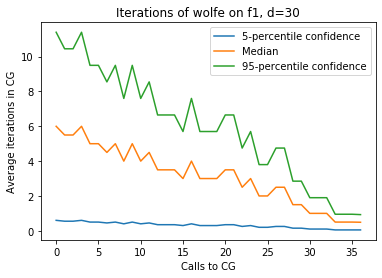

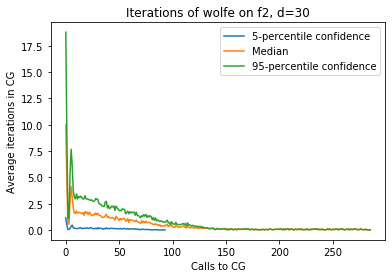

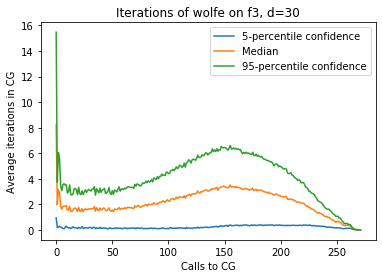

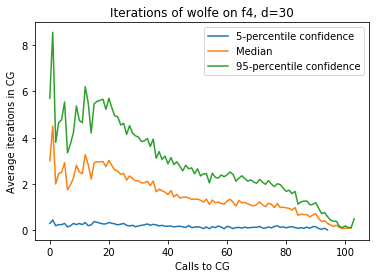

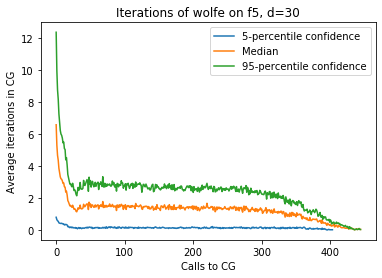

In [82]:
make_plot_steps(i1, "Iterations of wolfe on f1, d=30", "iter_f1_wolfe")
make_plot_steps(i2, "Iterations of wolfe on f2, d=30", "iter_f2_wolfe")
make_plot_steps(i3, "Iterations of wolfe on f3, d=30", "iter_f3_wolfe")
make_plot_steps(i4, "Iterations of wolfe on f4, d=30", "iter_f4_wolfe")
make_plot_steps(i5, "Iterations of wolfe on f5, d=30", "iter_f5_wolfe")

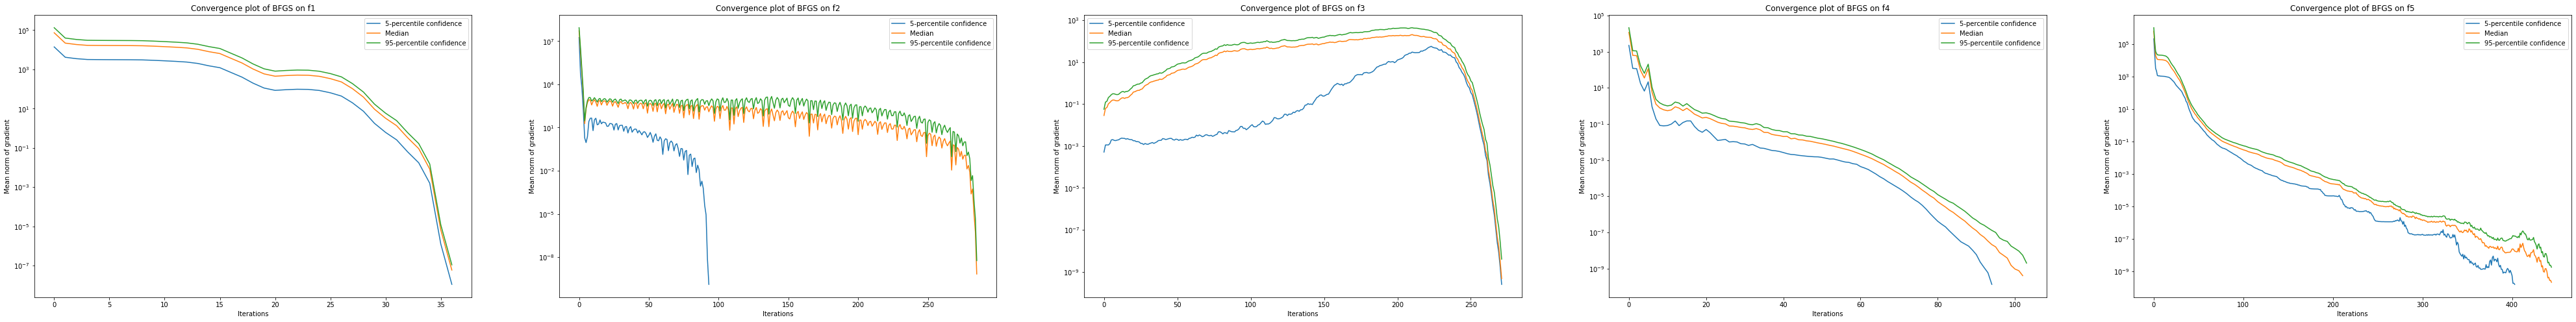

In [83]:
fig, axs = plt.subplots(1, 5, figsize=(70,8))
make_subplot(xks1, "Convergence plot of BFGS on f1", axs[0])
make_subplot(xks2, "Convergence plot of BFGS on f2", axs[1])
make_subplot(xks3, "Convergence plot of BFGS on f3", axs[2])
make_subplot(xks4, "Convergence plot of BFGS on f4", axs[3])
make_subplot(xks5, "Convergence plot of BFGS on f5", axs[4])

plt.savefig("Convergence_plots_100d")
plt.show()

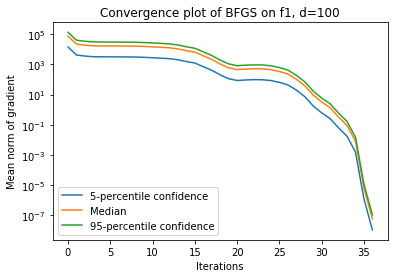

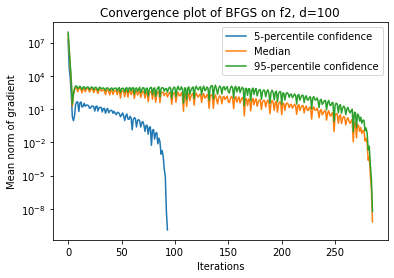

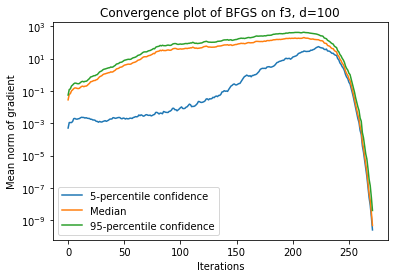

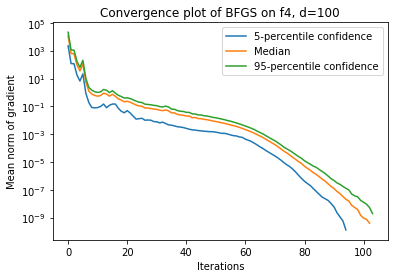

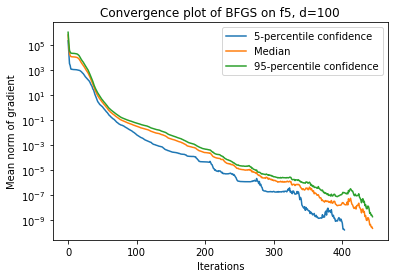

In [85]:
make_plot(xks1, "Convergence plot of BFGS on f1, d=100", "f1_conv_BFGS_c2_025")
make_plot(xks2, "Convergence plot of BFGS on f2, d=100", "f2_conv_BFGS_c2_025")
make_plot(xks3, "Convergence plot of BFGS on f3, d=100", "f3_conv_BFGS_c2_025")
make_plot(xks4, "Convergence plot of BFGS on f4, d=100", "f4_conv_BFGS_c2_025")
make_plot(xks5, "Convergence plot of BFGS on f5, d=100", "f5_conv_BFGS_c2_025")

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(50,10))
axs[0].plot(confidence_interval(xks1.copy(), 5))
axs[0].plot(confidence_interval(xks1.copy(), 50))
axs[0].plot(confidence_interval(xks1.copy(), 95))
axs[0].set_title("Convergence plot of")
axs[0].set_yscale('log')    
axs[0].set_xlabel("Iterations")
axs[0].set_ylabel("Mean norm of gradient")
axs[0].legend(["5-percentile confidence", "Median", "95-percentile confidence"])

## Test line search


In [ ]:
from alg import wolfe_search